In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit.providers.basicaer import BasicAer

from qiskit import QuantumCircuit, transpile, BasicAer, IBMQ
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

# loading your IBM Quantum account(s)
#provider = IBMQ.load_account()


In [2]:
from qiskit.tools.monitor import job_monitor
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
from sklearn.datasets import load_wine  # instead of qiskit.datasets.wine
#from qiskit_machine_learning.datasets import wine
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap, NLocal
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.primitives import Sampler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.metrics import classification_report, confusion_matrix
from time import time
seed = 10599

In [3]:
simulator = BasicAer.get_backend('statevector_simulator')
print(simulator)

statevector_simulator


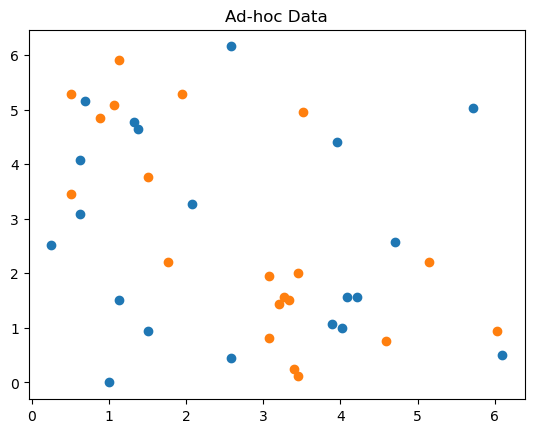

[[1.82212374 1.19380521]
 [0.43982297 0.56548668]
 [0.69115038 1.44513262]
 [2.70176968 5.02654825]
 [5.2150438  4.46106157]
 [4.0212386  1.25663706]
 [6.09468975 2.76460154]
 [2.136283   2.95309709]
 [1.0681415  6.22035345]
 [1.31946891 1.57079633]
 [4.83805269 5.27787566]
 [3.39292007 5.0893801 ]
 [5.02654825 0.62831853]
 [5.0893801  4.96371639]
 [6.03185789 0.69115038]
 [5.96902604 1.13097336]
 [1.44513262 3.39292007]
 [3.0787608  1.38230077]
 [3.26725636 4.90088454]
 [0.37699112 5.34070751]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
20


In [4]:
from qiskit_machine_learning.datasets import ad_hoc_data

feature_dim = 2
train_data, train_labels, test_data, test_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
#print(train_data)
#print(train_labels)
#print(len(train_data))
print(test_data)
print(test_labels)
print(len(test_data))

#extra_test_data = ad_hoc_data(sample_total=10, n=feature_dim)
#datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
#print(class_to_label)

In [5]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1)
ansatz = TwoLocal(feature_dim, ['ry', 'rz'], 'cz', reps=1)
vqc = VQC(
          feature_map=feature_map,
          ansatz=ansatz,
          optimizer=COBYLA(maxiter=1),
          quantum_instance=QuantumInstance(backend=simulator, shots=1,
                                           seed_simulator=seed,
                                           seed_transpiler=seed)
)

start_time = time()
vqc.fit(train_data, train_labels)
end_time = time()
duration = end_time - start_time
print("training time for VQC : ", duration)
result = vqc.predict(test_data)

training time for VQC :  0.06816530227661133


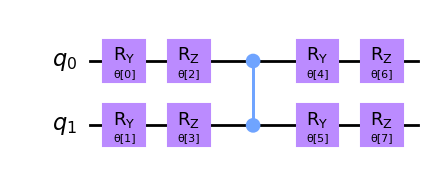

In [6]:
ansatz.decompose().draw(output='mpl')

In [7]:
result2=np.delete(result,1,1)
test_labels2=np.delete(test_labels,1,1)

In [8]:
print(classification_report(test_labels,result))
print(confusion_matrix(test_labels2,result2))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

   micro avg       0.80      0.80      0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20
 samples avg       0.80      0.80      0.80        20

[[7 3]
 [1 9]]


In [9]:
# Expressibility and entangling capability of parameterized quantum circuits for hybrid quantum-classical algorithms
# Reference: https://arxiv.org/pdf/1905.10876

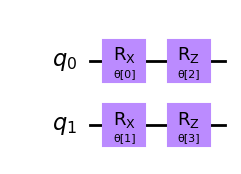

In [10]:
ansatz_circuit1 = TwoLocal(feature_dim, ['rx', 'rz'], reps=1, skip_final_rotation_layer=True)
ansatz_circuit1.decompose().draw(output='mpl')

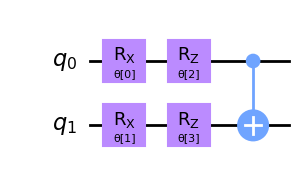

In [11]:
ansatz_circuit2 = TwoLocal(feature_dim, ['rx', 'rz'],'cx', entanglement='linear', reps=1, skip_final_rotation_layer=True)
ansatz_circuit2.decompose().draw(output='mpl')

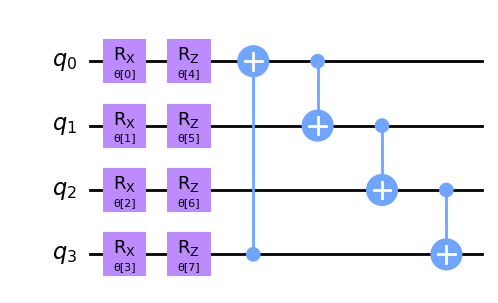

In [12]:
ansatz_circuit3 = TwoLocal(4, ['rx', 'rz'],'cx', entanglement='circular', reps=1, skip_final_rotation_layer=True)
ansatz_circuit3.decompose().draw(output='mpl')

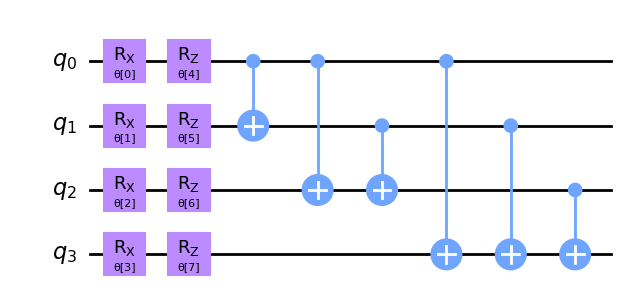

In [13]:
ansatz_circuit3 = TwoLocal(4, ['rx', 'rz'],'cx', entanglement='full', reps=1, skip_final_rotation_layer=True)
ansatz_circuit3.decompose().draw(output='mpl')